(lecture09:the-poisson-distribution)=
# The Poisson distribution

The Poisson distribution models the number of times an event occurs in an interval of space or time.
For example, a Poisson random variable $X$ may be:

+ The number earthquakes greater than 6 Richter occurring over the next 100 years.
+ The number of major floods over the next 100 years.
+ The number of patients arriving at the emergency room during the night shift.
+ The number of electrons hitting a detector in a specific time interval.

The Poisson is a good model when the following assumptions are true:
+ The number of times an event occurs in an interval takes values $0,1,2,\dots$.
+ Events occur independently.
+ The probability that an event occurs is constant per unit of time.
+ The average rate at which events occur is constant.
+ Events cannot occur at the same time.

When these assumptions are valid, we can write:

$$
X\sim \operatorname{Poisson}(\lambda),
$$

where $\lambda>0$ is the rate with each the events occur.
You read this as:
> The random variable $X$ follows a Poisson distribution with rate parameter $\lambda$.

The PMF of the Poisson is:

$$
p(X=k) = \frac{\lambda^ke^{-\lambda}}{k!}.
$$

Let's look at a specific example.
Historical data show that at a given region a major earthquake occurs once every 100 years on average.
What is the probability that $k$ such earthquakes will occur within the next 100 years.
Let $X$ be the random variable corresponding to the number of earthquakes over the next 100 years.
Assuming the Poisson model is valid, the rate parameter is $\lambda = 1$ and we have:

$$
X\sim \operatorname{Poisson}(1).
$$

Here is a Poisson random variable:

In [6]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [7]:
X = st.poisson(1.0)

And some samples from it:

In [8]:
X.rvs(10)

array([2, 0, 0, 0, 3, 1, 1, 0, 0, 0])

Let's plot the PMF:

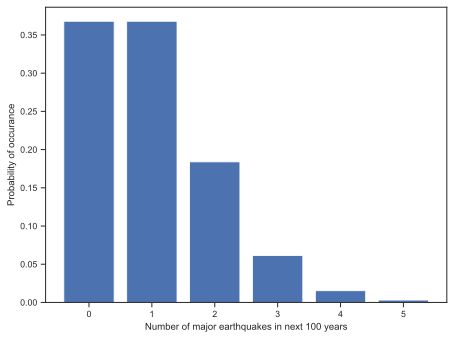

In [9]:
ks = range(6)
fig, ax = make_full_width_fig()
ax.bar(ks, X.pmf(ks))
ax.set_xlabel('Number of major earthquakes in next 100 years')
ax.set_ylabel('Probability of occurance')
save_for_book(fig, 'ch9.fig4')

You will investigate the Poisson distribution more in {ref}`lecture09:homework

## Questions

+ How would the rate parameter $\lambda$ change if the rate with each major earthquakes occured in the past was 2 every 100 years? Plot the pmf of the new Poisson random variable. You may have to add more points in the x-axis.